In [76]:
import pandas as pd
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
from tqdm import tqdm
from collections import defaultdict
import itertools

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Introduction 簡介</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Motivation 動機</div>

近幾年來，人工智慧討論在社群媒體上越來越受到關注。這些討論涵蓋了從技術趨勢到產業應用的各個方面。通過分析這些討論，我們可以了解人工智慧在不同領域的應用和發展趨勢，並從中發現有價值的見解和信息。

我們學院也紛常重視人工智慧的發展，因此我們希望通過分析社群媒體上的人工智慧討論，來了解人工智慧在台灣的發展情況，並探索人工智慧對我們學院的影響和機會。

比較特殊的是，我們主要選定是與工作、金融或者產品相關的討論，這樣可以更好地了解在職場和產業中人工智慧的應用和影響。並藉此，來探討人工智慧對我們未來的職業和學習的影響。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Objective 目標</div>

- 了解人工智慧在台灣的發展情況
- 探索人工智慧對我們學院的影響和機會
- 探討人工智慧對我們未來的職業和學習的影響
- 了解當下趨勢，並與過去進行比較，以發現變化和趨勢，幫助我們學習就業必要的技能和知識

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 1 月 1 日到 2024 年 5 月 31 日，共包含 2,172 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 2172 筆，無空值。
2. `artComment`: 文章評論，總共 2172 筆，無空值。
3. `artDate`: 文章日期，總共 2172 筆，無空值。
4. `insertedDate`: 插入日期，總共 2172 筆，無空值。
5. `artContent`: 文章內容，總共 2172 筆，無空值。
6. `artCatagory`: 文章類別，總共 2172 筆，無空值。
7. `dataSource`: 資料來源，總共 2172 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 2172 筆，無空值。
9. `artTitle`: 文章標題，總共 2172 筆，無空值。
10. `artUrl`: 文章網址，總共 2172 筆，無空值。

## 關鍵詞:
- 人工智慧, AI技術, 機器學習, 深度學習, 自然語言處理, 計算機視覺, 智能系統, 智能算法, 語音識別, 圖像處理, 文本生成, 語音識別, 語音合成, 對話系統, 情感分析, 自然語言處理, 語言生成, 多模態學習, 自監督學習, 跨語言模型, 語言模型, 人工智能, AI產業

## 版別:
- 金融業、外匯、工作、期權、打工、軟體工作、股票、科技工作、台灣產品

## 記憶體使用情況

- 資料集大小： 186.8+ KB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [77]:
df = pd.read_csv('data/ptt_ai_221130to240531.csv')
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,ggglu,Finance,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,2022-02-16 00:12:45,ptt
1,2,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,make1302,Finance,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,2022-05-22 01:11:41,ptt
2,3,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,kria5304,Finance,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,2023-02-15 01:06:37,ptt
3,4,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,BangBang5566,Finance,證交所徵才開創數位驅動時代 報名至11/17止\n\n中央社\n2023年10月30日 週一...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,2023-10-31 01:10:55,ptt
4,5,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,howdigh,job,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,[],125.230.247.67,2022-01-04 00:58:48,ptt


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2172 non-null   int64 
 1   artUrl        2172 non-null   object
 2   artTitle      2172 non-null   object
 3   artDate       2172 non-null   object
 4   artPoster     2172 non-null   object
 5   artCatagory   2172 non-null   object
 6   artContent    2172 non-null   object
 7   artComment    2172 non-null   object
 8   e_ip          2126 non-null   object
 9   insertedDate  2172 non-null   object
 10  dataSource    2172 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.8+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [79]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [80]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'insertedDate', 'dataSource', 'e_ip']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,【實習】，【公司名稱】Influx FinTech 普匯金融科技。【工作職缺】Fintech...
1,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長...,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威，，董事長呂...
2,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,週二 上午6:32，擁抱「金」飯碗的機會來了。中央銀行近日公開徵才，開出的職缺包括「經濟金...
3,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,證交所徵才開創數位驅動時代 報名至11/17止\n\n中央社\n2023年10月30日 週一...,證交所徵才開創數位驅動時代 報名至11/17止。中央社，2023年10月30日 週一 下午1...
4,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
5,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-05 15:59:05,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
6,[北部]林口長庚醫院醫療AI中心誠徵統計分析助理,2022-01-13 14:05:16,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
7,[台北]國立臺灣師範大學教育部計畫專任助理,2022-01-17 09:28:27,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
8,[台北]三軍總醫院AIoT中心誠徵博士級研究員,2022-01-20 16:52:39,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...
9,"[台北]4w+薪商標專利業務行銷撰稿,專利師",2022-01-21 18:30:13,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版禁止張貼違反「，就業服務法，」、，「，性別平等工作法，」、，「，勞基法，」與其他法律...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Setup Jieba 斷詞設定</div>

In [81]:
# 初始化斷詞引擎
jieba.set_dictionary('dict/dict.txt') 

# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict('dict/user_dict.txt')

# 參數形式手動將字詞加入斷詞字典
words = ["行動或市內電話"]
for w in words:
    jieba.add_word(w, freq=None, tag=None)

Building prefix dict from D:\GitHub\SocialMediaAnalysisAboutAITrend\dict\dict.txt ...
Loading model from cache C:\Users\eddie\AppData\Local\Temp\jieba.ub597ddb100a85c4b52bbc06e3b7935c2.cache
Loading model cost 0.497 seconds.
Prefix dict has been built successfully.


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Setup Stopwords 設定停用字</div>

In [82]:
# 對於這段文字所定義的停用字列表
with open(f'./dict/text_stopwords.txt', 'r', encoding="utf8") as f:
    stopwords = f.read().splitlines()  #移除換行符號\n

# 參數形式手動加入停用字
user_stop = [
    "的", "來", "對於", "愈來愈", "就是", "什麼",
    "空白", "00", "同義文字", "email", "站各級", "延長工時",
    "電子郵件", "市內電話", "條款", "限制", "應注意", "條文", "註明", "保",
    "詳盡", "資訊", "規範", "本條", "網站", "項", "留", "單位", "名稱", "法律",
    "條例", "使用者", "特殊", "條件", "時間", "內容", "其餘項目", "但不得", "本",
    "為每小時", "單位者", "為每小時", "依", "行", "相關", "第一項", "其他",
    "protected", "未註明", "現行法律", "其餘項留", "情況",
    "目前", "包含", "進行", "指出", "可以", "認為", "包括",
    "同時", "問題", "影響", "因此", "以及", "發展", "the", "and", '表示', '我們', '可能', '原文標題', '原文連結',
    '原文內容', 'in', 'on', 'for', 'that', 'our', '請務必',
    '心得評論', '工作', '使用', '現在', '已經', '因為', '自己', '透過', '他們', '提供', '開始', '不過', '需要',
    '記者署名', '去年', '成為', '針對', '如果', '甚至', '推出', '出現', '部分', '領域', '開發', '政府', '所以', '方式',
    '希望', '還是', '能力', '由於', '除了', '請具體', '方面', '獲得', '主要', '過去', '提升', '該公司', '資料', '此外',
    '報導', '生產', '能夠', '例如', '詳述狀況', '強調', '解決方案', '是否', '非常', '以上', '研究', '無法', '成功',
    '結果', '完成', '不同', '這樣', '如何', '機會', '安全', '數據', '處理', '研發', '宣布', '模型', '記者', '重要',
    '國家', '預估', '直接', '設備', '業者', '網路', '擁有', '之一', '另外', '利用', '必須', '支持', '成本', '應用',
    '一個', '人工智慧', 'AI', '公司', '市場', '億美元', '美元', 'rs', '這些', '表現', 'of', '持續', '雖然', '億元',
    '根據', '團隊', '隨著', '客戶', '其中', 'to', '這個', '未來', '平台', '產業', '產品', '今年', '今天', '預計', '預期']

for i in user_stop:
    stopwords.append(i)

pd.DataFrame(stopwords, columns=['停用詞'])

,停用詞
0,，
1,「
2,」
3,、
4,。
...,...
194,產品
195,今年
196,今天
197,預計


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Sentence 斷句</div>

In [83]:
# 利用標點符號將句子斷開
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

# 將斷詞後的句子存入新的 DataFrame
sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,【實習】
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,【公司名稱】Influx FinTech 普匯金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,【工作職缺】Fintech Marketing Intern/ Fiance Intern
3,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,【徵求條件】
4,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,1.商管相關科系或曾經接觸相關Fintech領域
5,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,2.關注時事議題
6,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,對國內外金融科技趨勢議題有興趣
7,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,3.熟悉 Office 軟體、社群軟體
8,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,具圖文影音創作能力者額外加分
9,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,4.具 Adobe illustrator / Adobe Photoshop / Adob...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Word 斷詞</div>

In [84]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,公司名稱Influx FinTech 普匯金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,工作職缺Fintech Marketing Intern Fiance Intern
3,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,徵求條件
4,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,1商管相關科系或曾經接觸相關Fintech領域
5,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,2關注時事議題
6,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,對國內外金融科技趨勢議題有興趣
7,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,3熟悉 Office 軟體社群軟體
8,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,具圖文影音創作能力者額外加分
9,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,4具 Adobe illustrator Adobe Photoshop Adobe P...


In [85]:
# 設定進度條
tqdm.pandas()

# 將句子進行斷詞
word_df = sent_df.assign(word = sent_df['sentence'].progress_apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

# 去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

100%|██████████| 148480/148480 [00:08<00:00, 18281.22it/s]


,artTitle,artDate,artContent,word
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,公司
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,名稱
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Influx
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,FinTech
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,普匯
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,金融
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,工作
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,職缺


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Deal with High Frequency Words 處理高頻詞</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Find High Frequency Words 找出高頻詞</div>

In [86]:
# 合併高頻詞組
def get_word_pairs(target_words):
    pairs = defaultdict(int)
    for sentence in target_words:
        for word1, word2 in itertools.combinations(sentence, 2):
            pairs[(word1, word2)] += 1
    return pairs

In [87]:
sentences = sent_df['sentence'].progress_apply(jieba.lcut)
word_pairs = get_word_pairs(sentences)
sorted_word_pairs = sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)

100%|██████████| 148480/148480 [00:08<00:00, 18083.05it/s]


In [88]:
sorted_word_pairs[:10]

[((' ', ' '), 146834),
 ((' ', '的'), 9408),
 (('的', ' '), 4615),
 (('的', '的'), 3923),
 (('是', '的'), 3384),
 ((' ', 'the'), 3278),
 (('在', '的'), 3255),
 ((' ', 'AI'), 3192),
 (('the', ' '), 2721),
 (('AI', ' '), 2641)]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Compute High Frequency Words 計算高頻詞</div>

In [89]:
high_freq_pairs = [(pair[0][0] + pair[0][1], pair[1]) for pair in sorted_word_pairs if pair[1] > 10]
high_freq_pairs[:10]

[('  ', 146834),
 (' 的', 9408),
 ('的 ', 4615),
 ('的的', 3923),
 ('是的', 3384),
 (' the', 3278),
 ('在的', 3255),
 (' AI', 3192),
 ('the ', 2721),
 ('AI ', 2641)]

In [90]:
high_freq_pairs

[('  ', 146834),
 (' 的', 9408),
 ('的 ', 4615),
 ('的的', 3923),
 ('是的', 3384),
 (' the', 3278),
 ('在的', 3255),
 (' AI', 3192),
 ('the ', 2721),
 ('AI ', 2641),
 ('AI的', 2435),
 ('和的', 2007),
 (' of', 2002),
 (' to', 1947),
 ('and ', 1930),
 (' and', 1846),
 ('在 ', 1818),
 ('of ', 1750),
 (' 和', 1706),
 ('to ', 1639),
 ('的是', 1621),
 ('有的', 1590),
 ('的和', 1503),
 (' 在', 1467),
 (' 是', 1464),
 ('了的', 1453),
 (' 年', 1444),
 (' 月', 1314),
 ('與的', 1292),
 (' in', 1292),
 ('對的', 1291),
 (' 與', 1267),
 ('和 ', 1238),
 (' 了', 1220),
 ('年 ', 1213),
 ('的AI', 1188),
 (' a', 1181),
 (' 有', 1171),
 ('in ', 1171),
 ('our ', 1167),
 ('是 ', 1156),
 (' 滿', 1143),
 (' 必需', 1141),
 (' 30', 1137),
 ('2 ', 1135),
 (' 字', 1133),
 (' 填寫', 1132),
 ('也的', 1125),
 (' 億美元', 1118),
 ('我們的', 1115),
 ('其他', 1110),
 ('心得 ', 1099),
 ('公司的', 1096),
 ('評論 ', 1077),
 ('a ', 1038),
 (' our', 1036),
 (' on', 1020),
 ('原文標題', 997),
 (' 等', 996),
 ('1 ', 984),
 ('on ', 975),
 ('原文連結', 970),
 ('年的', 937),
 ('3 ', 900),
 ('在中', 

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Update dictionary 更新字典</div>

In [91]:
# 更新斷詞字典
for word, freq in high_freq_pairs:
    jieba.add_word(word, freq=freq)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Tokenization Word with Updated Dictionary 重新斷詞</div>

In [92]:
# 重新斷詞
word_df = sent_df.assign(word=sent_df['sentence'].progress_apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)
word_df = word_df.loc[word_df['word'].str.len() > 1]

100%|██████████| 148480/148480 [00:07<00:00, 19723.30it/s]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Remove Stopwords 移除停用字</div>

In [93]:
no_stop_df = word_df[~word_df['word'].isin(stopwords)]
no_stop_df.head(10)

,artTitle,artDate,artContent,word
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,公司名稱
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Influx
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,FinTech
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,普匯
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,工作職缺
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Fintech
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Marketing
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Intern


In [94]:
# 去除是數字
no_stop_df = no_stop_df[~no_stop_df['word'].str.isnumeric()]

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Keyword Analysis 關鍵字分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency Analysis 關鍵字頻率分析</div>

In [95]:
# 計算詞頻
freq_df = pd.DataFrame(pd.value_counts(no_stop_df['word'])).sort_values(by=['count'], ascending=False).reset_index()

# 將詞頻資料集存入新的 DataFrame
freq_df.head(10)

,word,count
0,台灣,1599
1,美國,1199
2,中國,1096
3,台積電,873
4,技術,738
5,全球,672
6,投資,670
7,晶片,622
8,企業,600
9,合作,574


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency Visualization 關鍵字頻率視覺化</div>

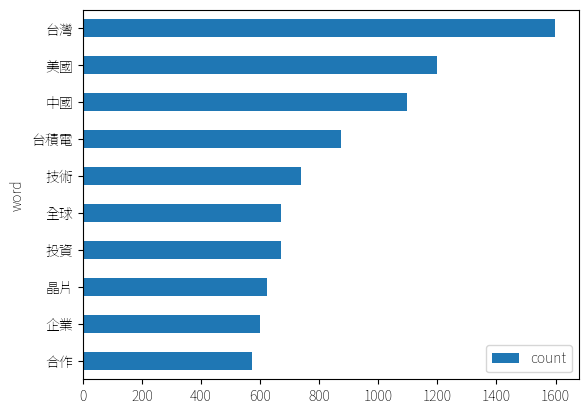

In [96]:
freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Keyword Frequency WordCloud 關鍵字頻率文字雲</div>

In [97]:
# wordcloud 的輸入須為 dict，因此先將 freq_df 轉換成成 dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'台灣': 1599,
 '美國': 1199,
 '中國': 1096,
 '台積電': 873,
 '技術': 738,
 '全球': 672,
 '投資': 670,
 '晶片': 622,
 '企業': 600,
 '合作': 574,
 '需求': 559,
 '成長': 554,
 '黃仁勳': 530,
 '增加': 524,
 '系統': 521,
 '輝達': 511,
 '科技': 508,
 '服務': 504,
 '計畫': 503,
 '生成式': 501,
 'Google': 477,
 '2023年': 459,
 '員工': 457,
 '台股': 449,
 'OpenAI': 439,
 '股價': 436,
 '2022年': 436,
 'GPU': 435,
 '設計': 429,
 'ChatGPT': 428,
 '超過': 418,
 '蘋果': 410,
 '微軟': 402,
 '國際': 396,
 '2024年': 393,
 '英特爾': 384,
 '半導體': 383,
 '大學': 375,
 '目標': 373,
 'AMD': 369,
 '分析': 362,
 '應該': 361,
 '經濟': 349,
 '營收': 340,
 '業務': 339,
 '智慧': 321,
 '人工智慧AI': 311,
 '推動': 311,
 '伺服器': 307,
 '鴻海': 306,
 '中心': 304,
 '投入': 300,
 '執行': 300,
 '活動': 299,
 '三星': 298,
 '廠商': 297,
 '看到': 296,
 '長期': 295,
 '日本': 295,
 'Meta': 294,
 '明年': 293,
 '價格': 292,
 '世界': 292,
 '之後': 290,
 '交易': 290,
 '進入': 289,
 '經驗': 288,
 'NVIDIA': 288,
 '比較': 288,
 '最新': 287,
 '最近': 287,
 '挑戰': 286,
 '協助': 286,
 'AI的': 284,
 '這是': 284,
 '指數': 282,
 '訓練': 282,
 '提高': 281,
 '營運': 279,
 '維持': 2

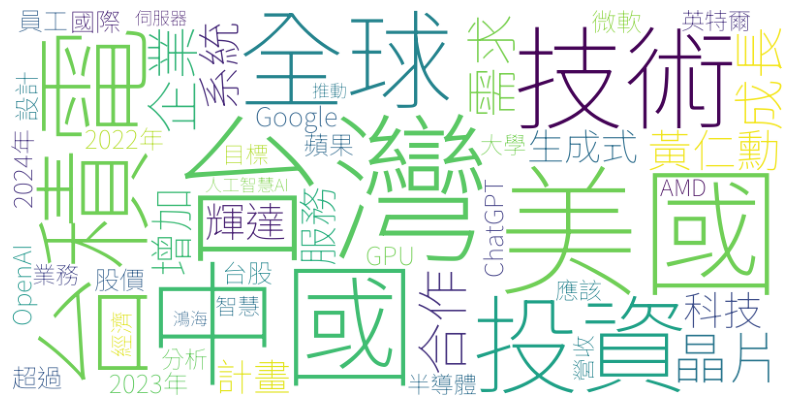

In [98]:
# 繪製文字雲
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

根據這個文字雲，我們可以觀察到以下幾點：

1. 主要國家和地區：
   - 美國和中國是出現頻率最高的詞，顯示了這兩個國家在AI討論中的重要性。
   - 台灣也有較高地出現頻率，可能是因為該討論集中在台灣的社群媒體上。

2. 主要技術和產業：
   - 技術、產業和服務這些詞彙頻繁出現，表明討論中關注了技術應用及其對產業的影響。
   - 晶片、GPU和AI晶片等詞彙的高頻出現，顯示了硬體技術在AI討論中的重要地位。

3. 時間和趨勢：
   - 2023年、2024年、2022年等年份的出現頻率較高，說明討論中涉及了過去、當前和未來的趨勢與預測。

4. 重要公司和產品：
   - Google、OpenAI、輝達（NVIDIA）等公司名詞頻繁出現，顯示了這些公司在AI領域的影響力。
   - ChatGPT和GPU等技術產品的出現頻率也較高，表明這些技術在討論中被廣泛提及。

5. 增長和發展：
   - 成長、增長、預期等詞彙的出現頻率高，顯示了討論中對AI技術和市場發展前景的關注。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: Compare with Different Years 與不同年份比較</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">選擇在 ChatGPT 發布前 2022 年 11 月 29 日之前的資料</div>

In [99]:
date = "2022-01-01"
end_date = "2022-11-29"

mask = (no_stop_df['artDate'] >= date) & (no_stop_df['artDate'] <= end_date)

no_stop_df_2022 = no_stop_df.loc[mask]
no_stop_df_2022.head(10)

,artTitle,artDate,artContent,word
0,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,實習
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,公司名稱
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Influx
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,FinTech
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,普匯
1,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,金融科技
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,工作職缺
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Fintech
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Marketing
2,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fin...,Intern


In [100]:
# 計算詞頻
freq_df_2022 = pd.DataFrame(pd.value_counts(no_stop_df_2022['word'])).sort_values(by=['count'], ascending=False).reset_index()

# 將詞頻資料集存入新的 DataFrame
freq_df_2022.head(10)

,word,count
0,台灣,277
1,中國,238
2,美國,229
3,技術,224
4,台積電,181
5,元宇宙,174
6,2022年,165
7,投資,157
8,企業,150
9,全球,147


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">視覺化 2022 年 11 月 29 日之前的資料</div>

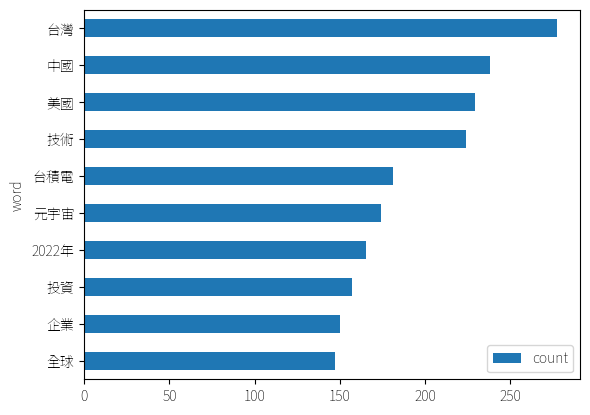

In [101]:
freq_df_2022.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()

plt.show()

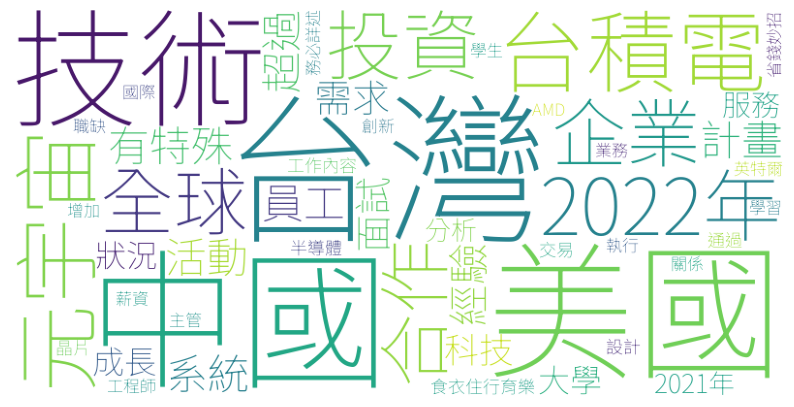

In [102]:
# wordcloud 的輸入須為 dict，因此先將 freq_df 轉換成成 dict
freq_dict_2022 = freq_df_2022.set_index('word').to_dict()
freq_dict_2022 = freq_dict_2022['count']

# 繪製文字雲
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)

wordcloud.generate_from_frequencies(freq_dict_2022)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

在ChatGPT出現前，討論主要集中在以下幾個方面：
- 地理位置：台灣、中國和美國是討論的主要地點。
- 技術趨勢：技術和特定企業如台積電、元宇宙是主要的討論焦點。
- 投資和企業：討論中還關注了企業運營和投資機會。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">選擇在 ChatGPT 發布後 2022 年 11 月 29 日之後到 2023 年 11 月 30 日的資料</div>

In [110]:
date = "2022-11-30"
end_date = "2023-11-30"

mask = (no_stop_df['artDate'] >= date) & (no_stop_df['artDate'] <= end_date)

no_stop_df_2023 = no_stop_df.loc[mask]
no_stop_df_2023.head(10)

,artTitle,artDate,artContent,word
111,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,週二
111,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,上午
112,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,擁抱
112,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,金飯碗
113,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,中央
113,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,銀行
113,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,近日
113,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,公開
113,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,徵才
114,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,https://tinyurl.com/3fcp6ehh\n記者陳美君／台北報導\n2023...,開出


In [111]:
# 計算詞頻
freq_df_2023 = pd.DataFrame(pd.value_counts(no_stop_df_2023['word'])).sort_values(by=['count'], ascending=False).reset_index()

# 將詞頻資料集存入新的 DataFrame
freq_df_2023.head(10)

,word,count
0,台灣,672
1,美國,540
2,中國,429
3,ChatGPT,374
4,台積電,359
5,生成式,317
6,投資,285
7,技術,278
8,全球,276
9,晶片,270


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">視覺化 2022 年 11 月 29 日之後的資料</div>

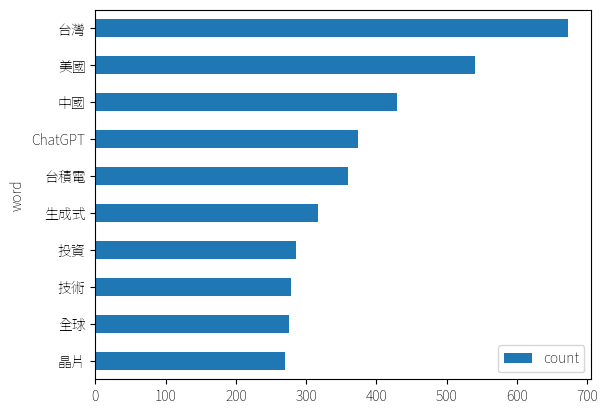

In [112]:
freq_df_2023.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()

plt.show()

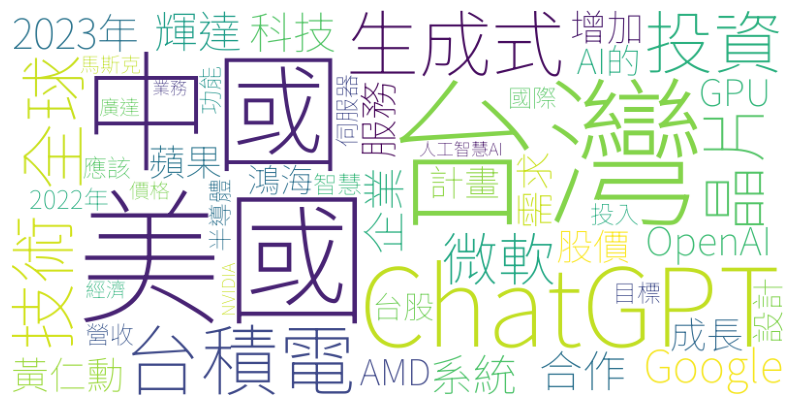

In [113]:
# wordcloud 的輸入須為 dict，因此先將 freq_df 轉換成成 dict
freq_dict_2023 = freq_df_2023.set_index('word').to_dict()

freq_dict_2023 = freq_dict_2023['count']

# 繪製文字雲
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)

wordcloud.generate_from_frequencies(freq_dict_2023)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

在ChatGPT出現後，討論主要集中在以下幾個方面：

- 地理位置：台灣、美國和中國仍然是討論的主要地點。
- 生成式AI技術：ChatGPT和生成式技術成為討論中的突出焦點。
- 硬體技術和相關企業：台積電、晶片和輝達等硬體技術和相關企業在討論中仍占據重要地位。
+ 投資和企業：對企業運營和投資機會的關注持續存在。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">比較 2022 年 11 月 29 日之前和之後的資料</div>

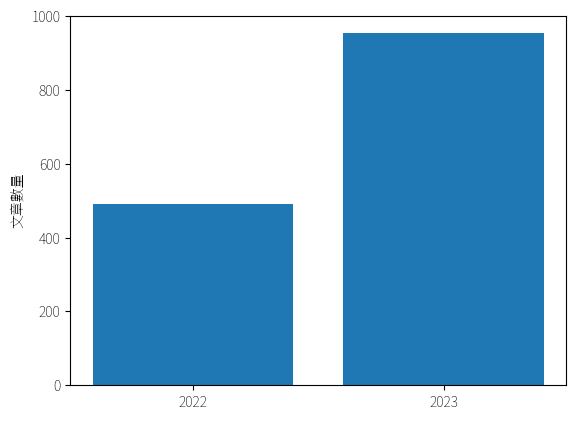

In [123]:
# 對比文章總數
total_2022 = df[(df['artDate'] >= '2022-01-01') & (df['artDate'] <= '2022-11-29')].shape[0]
total_2023 = df[(df['artDate'] >= '2022-11-30') & (df['artDate'] <= '2023-11-30')].shape[0]

plt.bar(['2022', '2023'], [total_2022, total_2023])
plt.ylabel('文章數量')
plt.show()

可以推測
- ChatGPT等生成式AI技術的出現和快速發展極大地推動了人工智慧的討論。這些技術在許多應用中的成功引起了廣泛關注，從而增加了相關文章的數量。
- 隨著AI技術在各行各業的應用增多，市場對AI技術的需求和投資也相應增加，導致更多的討論和報導。
- 2023年，許多新的研究成果和技術進步，進一步推動了AI技術的發展，引發了更多的關注和討論。

In [114]:
# 比較詞頻
freq_df_2022['year'] = '2022'
freq_df_2023['year'] = '2023'

compare_df = pd.concat([freq_df_2022, freq_df_2023], axis=0)
compare_df.head(10)

,word,count,year
0,台灣,277,2022
1,中國,238,2022
2,美國,229,2022
3,技術,224,2022
4,台積電,181,2022
5,元宇宙,174,2022
6,2022年,165,2022
7,投資,157,2022
8,企業,150,2022
9,全球,147,2022


In [115]:
# 繪製比較圖
compare_df = compare_df.groupby(['word', 'year']).sum().unstack().fillna(0)
compare_df.columns = compare_df.columns.droplevel()
compare_df = compare_df.sort_values(by=['2022'], ascending=False)

compare_df.head(10)

year,2022,2023
word,,
台灣,277.0,672.0
中國,238.0,429.0
美國,229.0,540.0
技術,224.0,278.0
台積電,181.0,359.0
元宇宙,174.0,52.0
2022年,165.0,169.0
投資,157.0,285.0
企業,150.0,244.0


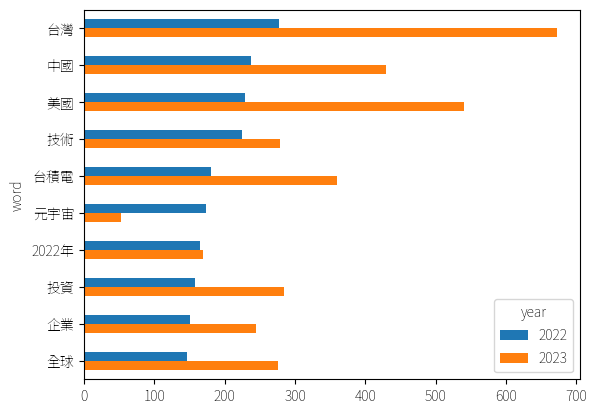

In [116]:
compare_df.head(10).plot.barh().invert_yaxis()

plt.show()

可以看到即便2023年的文章數量比2022年多，元宇宙的討論有顯著下降。這說明元宇宙在2022年是一個熱門話題，但在2023年的討論中受到了一定程度的影響。

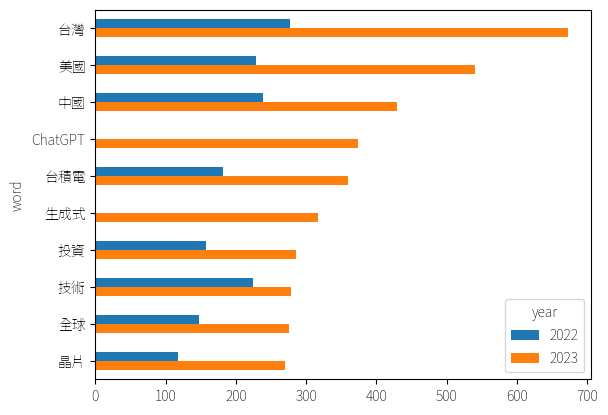

In [117]:
compare_df.sort_values(by=['2023'], ascending=False).head(10).plot.barh().invert_yaxis()

plt.show()

在2023年，ChatGPT和生成式AI技術成為討論的主要焦點，而硬體技術和相關企業仍然保持著重要地位。這表明生成式AI技術在2023年的討論中佔據了重要地位，並引起了廣泛的關注。

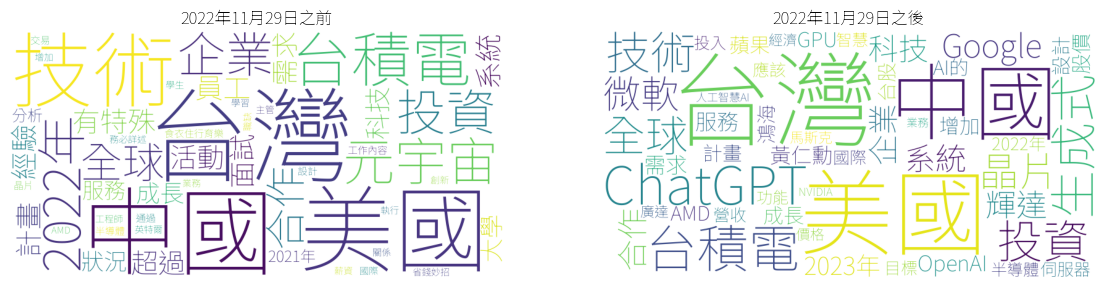

In [124]:
# 對比文字雲
plt.figure(figsize = (14,8))

plt.subplot(1, 2, 1)

wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)
wordcloud.generate_from_frequencies(freq_dict_2022)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('2022年11月29日之前')
plt.subplot(1, 2, 2)

wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)
wordcloud.generate_from_frequencies(freq_dict_2023)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('2022年11月29日之後')

plt.show()

### 文字雲比較（2022年11月29日之前 vs. 之後）

#### 2022年11月29日之前
1. 主要關鍵詞：
   - 技術、企業、台積電、投資、元宇宙：這些詞彙頻率較高，顯示了對技術發展、企業活動、投資機會和特定技術趨勢的關注。
   - 台灣、中國、美國：顯示了討論的地理集中點，反映了這些地區在AI和機器學習領域的重要性。

2. **技術焦點**：
   - 台積電、元宇宙：特定企業和技術趨勢成為討論焦點。
   - 有特殊、系統：顯示了對特定技術應用和系統的關注。

#### 2022年11月29日之後
1. 主要關鍵詞：
   - 技術、ChatGPT、台積電、投資、晶片：生成式AI技術，特別是ChatGPT成為新的焦點，顯示了這些技術在討論中的突出地位。
   - 台灣、中國、美國：這些地理位置仍然是討論的主要集中點。

2. 技術焦點：
   - ChatGPT、Google、微軟、OpenAI：顯示了生成式AI技術和相關公司的影響力。
   - 台積電、晶片、GPU：硬體技術在討論中仍然占據重要地位。

### 分析解析
對比2022年11月29日之前和之後的文字雲，可以觀察到幾個關鍵變化：

1. 生成式AI技術的崛起：
   - ChatGPT等生成式AI技術在2022年11月29日之後成為新的討論焦點，顯示了這些技術的快速發展和影響力。

2. 地理位置關注度的穩定：
   - 台灣、中國和美國在兩個時期的討論中都保持了高關注度，反映了這些地區在AI和機器學習領域的持續重要性。

3. 技術和企業的穩定性：
   - 台積電、晶片等技術和企業在兩個時期的討論中都保持了高頻率，顯示了它們在AI技術發展中的持續重要性。

4. 新增焦點：
   - 在2022年11月29日之後，生成式AI技術和相關公司如Google、微軟和OpenAI成為新的討論焦點，顯示了這些技術的快速崛起和影響力。

5. 元宇宙的變化：
    - 元宇宙在2022年11月29日之前是一個熱門話題，但在2023年的討論中受到了一定程度的影響，表明其討論度有所下降。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: Recent Trends 最新趨勢</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">選擇最新的資料（2023年11月30日之後）</div>

In [125]:
date = "2023-11-30"

mask = (no_stop_df['artDate'] >= date)

no_stop_df_recent = no_stop_df.loc[mask]
no_stop_df_recent.head(10)

,artTitle,artDate,artContent,word
4838,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,job版
4838,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,禁止張貼
4838,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,違反
4839,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,就業服務法
4842,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,性別
4842,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,平等工作法
4845,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,勞基法
4846,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,之文章
4847,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,發文者
4847,[台北]台大國發所誠徵計畫碩士級專任研究助理,2023-12-21 10:37:06,job版禁止張貼違反「\n就業服務法\n」、\n「\n性別平等工作法\n」、\n「\n勞基法...,已同意


In [126]:
# 計算詞頻
freq_df_recent = pd.DataFrame(pd.value_counts(no_stop_df_recent['word'])).sort_values(by=['count'], ascending=False).reset_index()

# 將詞頻資料集存入新的 DataFrame
freq_df_recent.head(10)

,word,count
0,台灣,650
1,美國,430
2,中國,429
3,台積電,333
4,黃仁勳,292
5,2024年,267
6,全球,249
7,輝達,241
8,技術,236
9,晶片,234


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">視覺化最新趨勢</div>

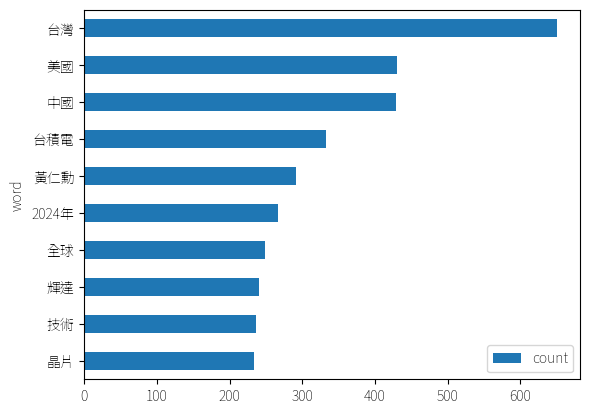

In [128]:
freq_df_recent.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()

plt.show()

(-0.5, 799.5, 399.5, -0.5)

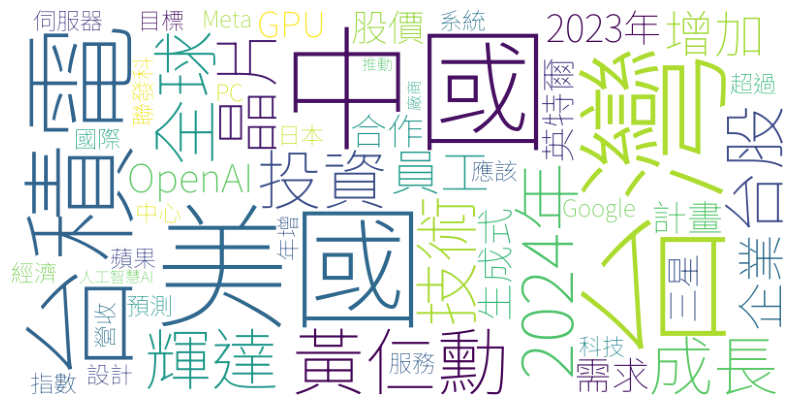

In [127]:
# wordcloud 的輸入須為 dict，因此先將 freq_df 轉換成成 dict
freq_dict_recent = freq_df_recent.set_index('word').to_dict()

freq_dict_recent = freq_dict_recent['count']

# 繪製文字雲
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50, font_path=font_path)
wordcloud.generate_from_frequencies(freq_dict_recent)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')

對比2022年、2023年和2024年初的討論，可以觀察到幾個關鍵變化和持續趨勢：

- 台灣、中國和美國在討論中一直保持高關注度，反映了這些地區在AI和機器學習領域的持續重要性。
- 台積電、輝達等企業和技術在討論中持續占據重要地位，顯示了它們在AI技術發展中的核心角色。
- 生成式AI技術和相關公司如OpenAI、Meta、Google等在討論中的重要性持續增加，顯示了這些技術和企業的影響力。
- 黃仁勳等技術領袖在討論中的高頻出現，顯示了這些人物對技術發展的影響。

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 7: Conclusion 結論</div>

就目前的分析結果來看，AI技術和市場的討論主要集中在以下幾個方面：

1. 生成式AI技術的崛起，ChatGPT等生成式AI技術在討論中佔據重要地位，引起了廣泛的關注。
2. 台積電、晶片等硬體技術和相關企業在討論中仍然占據重要地位。
3. 台灣、中國和美國在討論中保持高關注度，反映了這些地區在AI和機器學習領域的重要性。
4. 投資和企業運營仍然是討論的重要焦點，顯示了市場對AI技術和應用的持續關注。
5. 元宇宙的熱度有所下降，而生成式AI技術和硬體技術等新興技術和企業則受到更多關注。